# General exploration

## Set-up

In [1]:
try:
    # If we are not on google colab we need to upgrade pandas...
    from google.colab import widgets
    !pip install pandas --upgrade
except ModuleNotFoundError:
    # If we are not on google colab we pass
    pass


from distutils.version import LooseVersion
import pandas as pd
# As we are using features from pandas 0.23, we need to
# check that the correct version is used.
assert LooseVersion(pd.__version__) > LooseVersion('0.23'), """
If you are on Google Colab and this fails, make sure you "restart runtime"
after running the cell that install the newest version of Pandas
If you are not on Google Colab and this fails, please update your
Pandas version: pip install --upgrade pandas
"""

In [2]:
# The block of code is here to make the notebook Google Colab compatible
try:
    # If we are not on google colab (we assume that you don't have 
    # the google.colab module on your computer...), 
    # the line below will raise an error that will be catch :)
    from google.colab import widgets
    # We clean the content of the directory, so that we can use
    #  git clone directly in it
    !rm -rf *
    !rm -rf .*
    !git clone https://github.com/striantafyllouEPFL/healthy-candies.git .
    # We get the data and initialize everything
    !python ./init_project.py
except ModuleNotFoundError:
    pass

In [3]:
import pandas as pd
import numpy as np

# Project specific module/functions
from healthy_candies.load import load_data
from healthy_candies.path import OFF_CAT_CSV, WIKIDATA_CAT_TREE_CSV
from healthy_candies.utils import plot_settings, log_bins


import seaborn as sns
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [4]:
# further plot settings
sns.set()  # Use default seaborn styling for all plots
sns.set_context('notebook')
plt.rcParams['figure.dpi'] = 100

In [5]:
# Load the dataset for exploration
df = load_data(limit_have_nutri_score=False)

## Generalities

Let's first take a simple look at the structure of the dataset.

We can see that we have $\approx 700 \, 000$ products in the dataset that are described by $173$ features.

In [6]:
df.shape

(698477, 173)

## How sparse is the dataset ?

The first exploration we had done for milestone 1 had shown that the data was quite sparse. This is confirmed by looking at the distribution of the number of *valid* values inside all the columns. Below we can see that most of the columns in the dataset are very sparse.

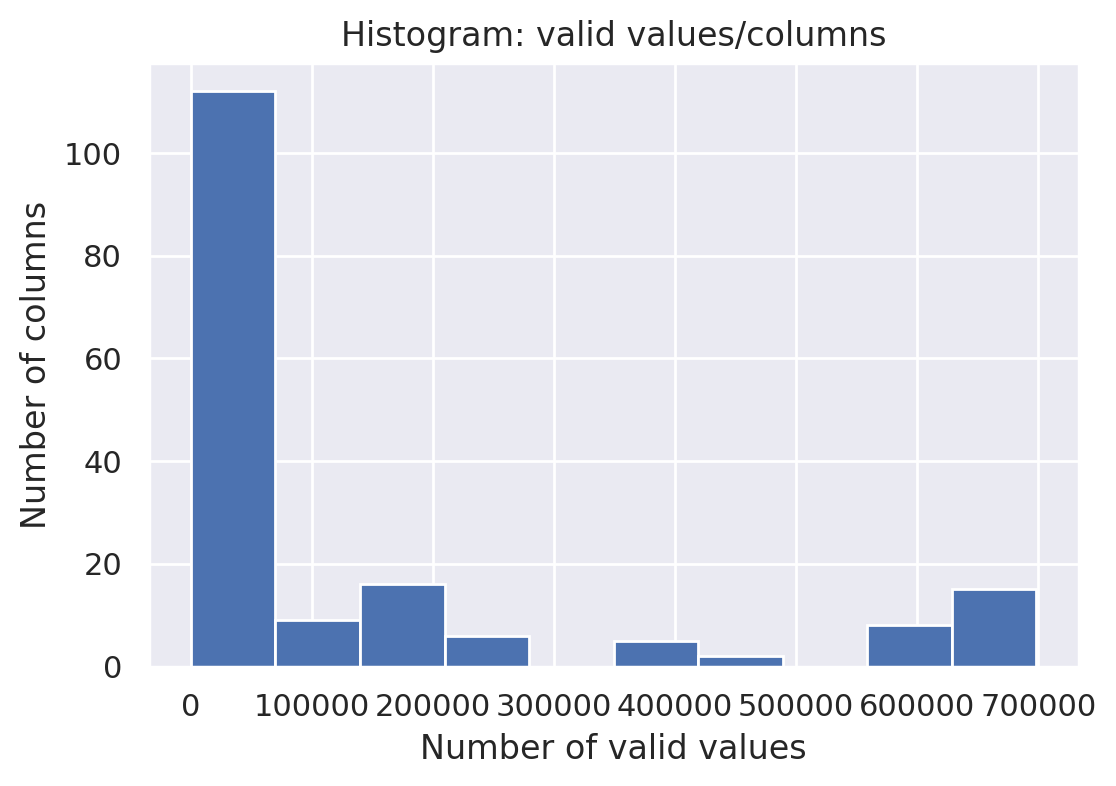

In [7]:
counts = df.count()
counts.hist()
plot_settings({
    'title': 'Histogram: valid values/columns',
    'xlabel': 'Number of valid values',
    'ylabel': 'Number of columns'
})

For this project, we are interested in having sufficient data about diverse types of products, we won't be able to work with all the columns. Good news, when we take a look at the columns that have at least $70 \, 000$ products, we can see that the one we would be interested in (mostly the ones related to nutrition facts) are present.

In [8]:
counts.index[counts > 70000]

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'labels', 'labels_tags', 'labels_en', 'purchase_places', 'stores',
       'countries', 'countries_tags', 'countries_en', 'ingredients_text',
       'serving_size', 'serving_quantity', 'additives_n', 'additives',
       'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en',
       'main_category', 'main_category_en', 'image_url', 'image_small_url',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100

*We will take a closer look at the column that we are interested in other notebooks. Especially because we will need some valid values in multiple columns simultaneously.*

## Cleaning

From a general point, we can see that there is already a bit of cleaning that can be performed.

- We have some duplicated data (moving on in the project we will remove those duplicated data).

In [9]:
# the url field is expected to be an identifier of a product
sum(df.url.duplicated())

70

- We will have to keep in mind that the data is not fully reliable as it is collected in a collaborative way.
However, no cleaning can be performed here as it would require to doublecheck.
Still we can see that some values are completely out of relevant range (as seen below). So we will clean what is false for sure and assume the rest as correct.

In [10]:
df.calcium_100g.describe()

count    143473.000000
mean          0.185933
std           5.407835
min           0.000000
25%           0.000000
50%           0.036000
75%           0.111000
max         779.000000
Name: calcium_100g, dtype: float64